----------------------------------

# Visão Geral

- Leitura: 30 min
- Exercícios: 15 min 

### Requisitos:
- Conhecidos básicos da linguagem Python

### Conteúdo:
1. Transformações de imagens digitais
2. Operações aritméticas em imagens digitais
---------------------------

Na lição anterior, demonstrou-se que as imagens digitais são definidas como matrizes retangulares de pixels. A cor de cada pixel é definida por um modelo de cor, geralmente, o modelo RGB.

### 1. Transformações de imagens digitais

Em diversas aplicações de processamento de imagens é necessários realizar transformações sobre as imagens. As transformações mais comuns são o redimensionamento, corte e rotacionamento.

#### 1.1 Redimensionamento de imagens digitais

Para redimensionar uma imagem em python com opencv existe a função *resize* mostrada abaixo.

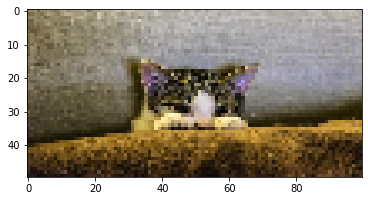

In [22]:
### importação da biblioteca opencv e matplotlib
import cv2
import matplotlib.pyplot as plt

# abrindo a imagem
imagem = cv2.imread('../figures/gato.jpg')
# convertendo a imagem para o modelo RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# definindo a nova resolução da imagem
nova_largura = 100 # em pixels
nova_altura = 50

# redimensionando a imagem
imagem_redimensionada = cv2.resize(imagem, (nova_largura, nova_altura), cv2.INTER_LINEAR)

# mostrando a imagem
plt.imshow(imagem_redimensionada)

O terceiro parâmetro da função *resize* é uma constante do opencv que especifica qual é o cálculo matemárico para redimensionar a imagem. No exemplo, utilizamos cv2.INTER_LINEAR que é o método padrão. A lista dos algoritmos é descrita a seguir:

- INTER_NEAREST: interpolação pelo vizinho mais próximo.
- INTER_LINEAR: interpolação bilinear (padrão).
- INTER_AREA: reamostragem usando relação entre pixel e área. - INTER_CUBIC: uma interpolação bicúbica em vizinhança de 4x4 pixels.
- INTER_LANCZOS4 - uma interpolação de Lanczos em uma vizinhança de 8x8 pixels.

A vizinhança dos pixels pode ser visualizada na figura abaixo:

vizinhança 4x4, v_ é a posição do vizinho e x representa o pixel central.

|   |v1 |   |
|---|:-:|---|
|**v4**| x |**v2**|
|   |**v3**|   |

vizinhança 8x8, v_ é a posição do vizinho e x representa o pixel central.

|v1  |v2 |v3 |
|---|:-:|---|
|**v8**| x |**v4**|
|**v7**|**v6**|**v5**|


#### 1.2 Cortando imagens digitais

Como a biblioteca em OpenCV trata um imagem digital como um objeto do tipo numpy array, é possivel usar o fatiamento (*slicing*) para recortar uma imagem.

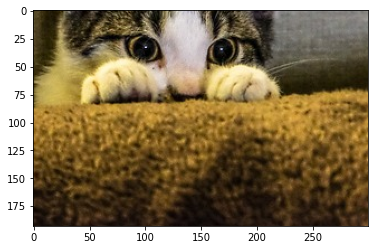

In [25]:
# abrindo a imagem
imagem = cv2.imread('../figures/gato.jpg')
# convertendo a imagem para o modelo RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# recortando uma imagem
imagem_recortada = imagem[200:500, 200:500]
plt.imshow(imagem_recortada)

#### 1.3 Espelhamento de uma imagem digital

A biblioteca OpenCV disponibiliza a função *flip* para realizar o espelhamento da imagem. 

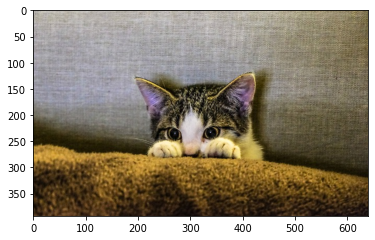

In [31]:
# abrindo a imagem
imagem = cv2.imread('../figures/gato.jpg')
# convertendo a imagem para o modelo RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# horizontal flip (especificado pelo valor 1)
imagem_flip_horizontal = cv2.flip(imagem, 1)
plt.imshow(imagem_flip_horizontal)

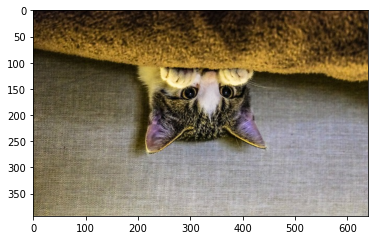

In [33]:

# vertical flip (especificado pelo valor 1)
imagem_flip_vertical = cv2.flip(imagem, 0)
plt.imshow(imagem_flip_vertical)

#### 1.4 Rotacionando uma imagem digital

Para realizar rotacionamento das imagens digitais a biblioteca OpenCV possui a função *warpAffine*. Está função, basicamente, realiza transformações do tipo *affine* preservando as informações espaciais dos pixels.

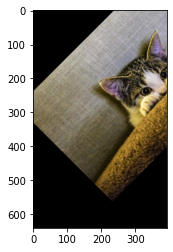

In [40]:
# abrindo a imagem
imagem = cv2.imread('../figures/gato.jpg')
# convertendo a imagem para o modelo RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# por conveniência salvamos a altura e largura da imagem em variáveis
(altura, largura) = imagem.shape[:2]
# calcula o centro da imagem
centro = (largura / 2, altura / 2)

# rotacionando a imagem em 45 graus
# calcula a matriz de rotação em qualquer ângulo
M = cv2.getRotationMatrix2D(centro, 45, 1.0)
imagem_rotacionada = cv2.warpAffine(imagem, M, (altura, largura))
plt.imshow(imagem_rotacionada)

O terceiro parâmetro da função *getRotationMatrix2D* representa a escala da imagem. O valor desse parâmetro igual a 1 preserva as dimensões originais da imagem, alterações neste valor permite realizar operações de redimensionamento, por exemplo, um zoom.

# Apoio

Universidade Tecnólogica Federal do Paraná - UTFPR

# Referências

- Documentação do OpenCV-Python-Tutoriais (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations)

- Antonello, R. (2014). Introdução a Visão Computacional com Python e OpenCV. Engenharia de Controle e Automação do Instituto Federal Catarinense–IFC, campus Luzerna.

- Brilhador, A. (2015). Análise semi-automática do arranjo espacial de plantas de milho utilizando visão computacional (Master's thesis, Universidade Tecnológica Federal do Paraná).

- Lições para pesquisadores de Data Carpentry (https://datacarpentry.org/image-processing/02-image-basics/index.html).

- A imagem gato.jpg foi obtida do site pixabay.com e possuí licença de domínio público.